# Лабораторная работа #2

<font color='red'>
Внимание. Данная рабочая книга JuputerNotebook требует запуска именно на локальном компьютере с графической операционной системой (Windows, Linux, MacOS)
</font>


- **Материалы для ЛР расположены в гугл-папке [чтение по ссылке]:
“НСиНК-2025.02_[для студентов]”, URL:** https://drive.google.com/drive/folders/1JkCcL_zeRcajUdeH6jaLfAxJ30YGLjI2

## Цель работы:
Исследовать принцип работы сети Хопфилда и её сходимость к
аттракторам, применение сети Хопфилда для распознавания образов.

## Ход работы

1. Ознакомится с базовыми понятиями
2. Закрепить индивидуальный вариант:

    2.1 Получить от преподавателя размер изображения в пикселях
   
    2.2 Выбрать самостоятельно  вид графических символов
   

4. Ознакомиться с приёмами изменения размерности в библиотеке Numpy
5. Создать (вручную, либо рисованием и загрузкой) 6-10 изображений заданного размера, соответвующие следующим требованиям:
  - одно изображение - один уникальный символ;
  - символы должны различаться большим количеством пикселей, избегайте визуально схожих (пример не подходящих: символ букв "O" и "Q");
  - символ должен распологаться по центру изображения и занимать большую его прощадь;

6. Создать и обучить НС Хопфилда на отдельных комплектах изображений. Для каждого обучения получить тепловую карту весовых коэфф. и зафиксировать в отчёте. Комплекты выбранных изображений:
   - Единственное изображение №1
   - Единственное изображение №2
   - Единственное изображение №3
   - Пара №1 изображений
   - Пара №2 изображений
   - Группы из трех и более изображений

7. Определить максимальную ёмкость НС Хопфилда вашей конфигурации следующим путём:
  - последовательного обучать НС на всё большем кол-ве изображений (3, 4, 5, т.д)
  - после каждого обучения проводить опрос НС на всех образцах без искажений
  - если ответ НС содержит изображения совпадающие с передаными на вход НС, увеличить кол-во в комплекте
  - если ответы НС начинают отличаться от переданых на вход, зафиксировать кол-во N_max и состав комлекта изображений при котором в

8. Обучить НС Хофилда на комплекте из N_max-1 избражений (кол-во, которое позволяет получить ответы НС совпадающие с передаными на вход). Для полученной НС провести проверку на устойсивость к искажениям для различных символов:
  - Выбрать символ из комплекта обучения
  - Внести искажения в сивмол путём замены значений некоторых пикселей
  - Подать изображение с искажениями на вход НС
  - Сравнить изображение на входе и выходе НС
  - Результаты зафиксировать в отчёте

## Требования к отчетным файлам
<ul>
<font color='red'>
<li> Формат отчёта: *doc, *docx </li>
<li> Формат файла с исходным кодом *ipynb, упакованный в *zip-архив </li>

<li> Название отчета и файла с исходным кодом должно быть в формате: "АВТ-0xx_ЛР-xx_Фамилия1_Фамилия2" </li>

<li> Каждый участник бригады отсылает в своем ЛК Диспейс следующие файлы:</li>

  <ul> <font color='red'>
    <li> АВТ-0xx_ЛР-xx_Фамилия1_Фамилия2.docx </li>
    <li> АВТ-0xx_ЛР-xx_Фамилия1_Фамилия2.zip </li>
    <ul> <font color='red'>
      <li> АВТ-0xx_ЛР-xx_Фамилия1_Фамилия2.ipynb </li>
    </font> </ul>
  </font> </ul>
</font>
</ul>
<br>

Содержание отчёта
1. Краткое описание и иллюстрации действий по ходу работы;
2. Выводы и краткие описания полученных результатов


## Дополнительные материалы
1) Хайкин С., "Нейронные сети: полный курс", 2008, стр. 856, гл. 14.7. Модель Хопфилда

2) Hopfield Networks is All You Need, URL: https://ml-jku.github.io/hopfield-layers/

# Подключение библиотек

Рекомендуемая версия 3.10.11, допустимы версии <= 3.12.8 (ограничение от Tensorflow, по состояние на 2025-02)

Для выполнения работы потребуется установить дополнительную библиотеки:
- neurolab - с реализацией сетей Хопфилда.
- plotly - для отображения интерактивных графиков

Команда для установки:
```
> …Путь_к_Python\python -m pip install --upgrade pip
> …Путь_к_Python\python -m pip  install   numpy==1.26.4 scipy pandas scikit-learn jupyterlab    matplotlib seaborn plotly    tensorflow==2.18.0  json5  neurolab tk Pillow
```
**Примечание. Версия библиотеки neurolab=0.3.5 требует версию Numpy<=1.26.4 и не совместима с версией Numpy>=2.0*

In [1]:
# Вызов команды установки библиотеки из среды jupyter
#!pip3 install neurolab

In [2]:
# Проверка версий и пути к выбранному интерпретатору
import sys
print(f"Версия Python - {sys.version}")
print(f"Путь к интерпретатору Python - {sys.executable}")

Версия Python - 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
Путь к интерпретатору Python - C:\Programs\Python310x64\python.exe


In [11]:
import numpy as np

In [12]:
import neurolab as nl

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [15]:
import PIL
from PIL import ImageTk, Image, ImageDraw, ImageOps

import tkinter as tk
import datetime
import os

In [16]:
import glob

In [17]:
# Проверка версий библиотек
for lib in [np, nl]:
    print(f"{lib.__name__:<12} {lib.__version__}")

numpy        1.26.4
neurolab     0.3.5


# Введение

Нейронная сеть Хопфилда является
полносвязной нейронной сетью с симметричной матрицей связей. Между сетями Хопфилда и рекуррентными (RNN) существуют различия,
сети Хопфилда - частный случай рекуррентных.
Содержит единственный полносвязный слой (каждый нейрон имеет связь со всеми другими, а также дополнительную связь с временной задержкой сам на себя). Нейроны на этом слое в зависимости от временнОго работы НС исполняют роль входных, скрытых (промежуточных), выходных. Каждый нейрон является классическим искусственным нейроном (содержит механизм взвешивания входных сигналов, их суммирования, возможность применить к накопленной сумме нелинейной функции активации).

Важным моментом при работе с дискретной НС Хопфилда является условие, чтобы входные значения были равны -1 или 1.

Полный механизм работы НС Хопфилда достаточно сложен и рассомтрен в источнике [1]. Коротко он может быть характеризован цитатой: _"...Эволюция во времени непрерывной модели Хопфилда, описываемой системой нелинейных дифференциальных уравнений первого порядка, представляет собой некоторую траекторию в пространстве состояний, обеспечивающую нахождение минимума функции энергии (Ляпунова) и приходящую к некоторой фиксированной точке..."_ [1, стр. 860]

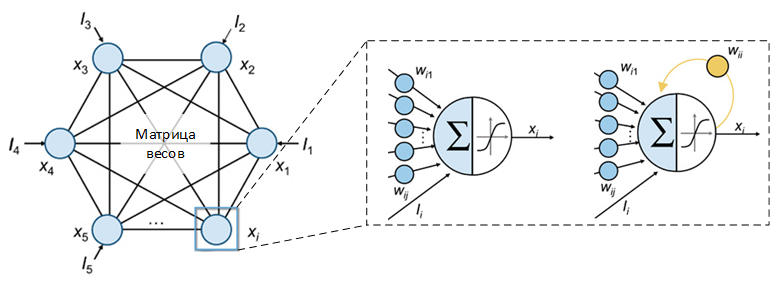

## Функции активации

Функции активации (activation), они же носят название передаточные (transfer), в НС осуществляют нелинейное преобразование, к пришедшим на вход данным. В используемом пакете `neurolab.trans.*` реализованы следующие функции

|Название| y|Описание|
|-|-|-|
|Competitive| [0, 1]| Зануляет все значения, кроме минимального|
|HardLim    | [0, 1]| Ступенчатая функция|
|HardLims   | [-1, 1]| Симметричная ступенчатая функция |
|LogSig     | [0, 1]| Логарифм сигмоиды |
|PureLin    | [-inf, +inf]| Линейная |
|SatLin     | [0, 1]| Линейная в интервале x=[0, 1], c насыщением вне интервала   |
|SatLinPrm  | [0, 1]| Линейная с параметрическим выводом |
|SatLins    | [-1, 1]| Симметричная линейная в интервале x=[0, 1], c насыщением вне интервала |
|SoftMax    | [-1, 1]| Softmax |
|TanSig     | [-1, 1]| Гиперболический тангенс |

Transfer functions, URL  https://pythonhosted.org/neurolab/lib.html#module-neurolab.trans

Осмотрим вид функций активации в зависимости от изменений аргумента.
График является интерактивным. Нажимая на название функции в легенде графика вы можете управлять его отображением.

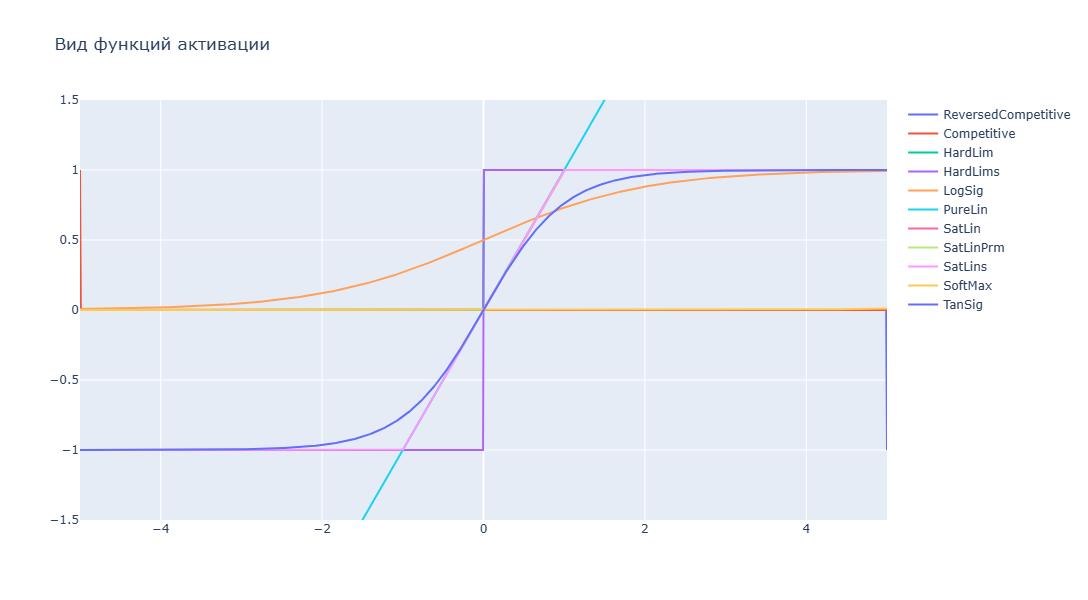

In [18]:
# задать область определений
x = np.linspace(start=-5, stop=5, num=1000)

# Перечислить интересующие ф. активации в словаре (хэш-таблице)
funcActDict = {
     'Competitive': nl.trans.Competitive(),
     'HardLim'    : nl.trans.HardLim(),   #  0, 1
     'HardLims'   : nl.trans.HardLims(),  # -1, 1
     'LogSig'     : nl.trans.LogSig(),    #  0, 1
     'PureLin'    : nl.trans.PureLin(),   #  -inf, +inf
     'SatLin'     : nl.trans.SatLin(),    #  0, 1
     'SatLinPrm'  : nl.trans.SatLinPrm(), #  0, 1
     'SatLins'    : nl.trans.SatLins(),   # -1, 1
     'SoftMax'    : nl.trans.SoftMax(),
     'TanSig'     : nl.trans.TanSig(),    # -1, 1
    }

# Создать полотно для графика
fig = make_subplots(rows=1, cols=1, )
func = funcActDict['Competitive']
y = -func(x)
fig.add_trace(go.Scatter(   x=-x,   y=y, name='ReversedCompetitive',), row=1, col=1)
# Вычислить зн. y и отобразить для каждого соотвествующей функции
for funcName in funcActDict.keys():
    func = funcActDict[funcName]
    y = func(x)
    fig.add_trace(go.Scatter(   x=x,   y=y, name=funcName,), row=1, col=1)
fig.update_layout(height=600, width=600,  title_text="Вид функций активации")
fig.update_layout(hovermode='x unified')
fig.update_layout(yaxis_range=[-1.5, 1.5])
fig.show()

# Подготовка данных

Растровые изображения могут быть представлены как матрица значений пикселей, определённой размерности.

## Знакомство с приёмами измерения мерности массива Numpy

Библиотека NumPy для работы с многомерными массивами содержит ряд функций, используемых в данной работе.

Для освоения некоторых приёмов работы, создадим объект `myList` с типом данных `list` и значениями от 1 до 12.

In [19]:
myList = [1,2,3,4,5,6,7,8,9,10,11,12,]
print(myList)
print('type  = ', type(myList))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
type  =  <class 'list'>


Функция `np.array(array_like)` и `np.asarray(array_like,  dtype=float)`, принимая списочную структуру, создаёт новый массив с типом данных `numpy.ndarray`.

In [20]:
myNumpyArr = np.asarray( myList,  dtype=float)
print(myNumpyArr)
print('type  = ', type(myNumpyArr))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
type  =  <class 'numpy.ndarray'>


Объект массив Numpy содержит атрибут `.shape`, который возвращает текущую размерность массива.

In [21]:
print(myNumpyArr)
print('shape = ', myNumpyArr.shape)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
shape =  (12,)


Размерность массива можно изменять, "переупаковывая значения" в одно-, двух-, многомерное представление исходного. Для этого используется функция `.reshape( новая_размерность, ... )`, где новый размер может быть указан единственным положительным целым числом, либо последовательностью таких чисел. Допустимо использовать в качестве одного из значений размерности `-1`, для автоматического подбора допустимого значения.

In [22]:
myNumpyArr= myNumpyArr.reshape(3,4) # 3 строки, 4 столбца
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (3, 4)
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [23]:
myNumpyArr= myNumpyArr.reshape(4,3) # 4 строки, 3 столбца
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (4, 3)
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [24]:
myNumpyArr= myNumpyArr.reshape(-1,2) # автоматически подобрать кол-во строк, 2 столбца
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (6, 2)
[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]
 [11. 12.]]


In [25]:
myNumpyArr= myNumpyArr.reshape(3,2,2) # трехмерный массив: 3 слоя, 2 строки, 2 столбца
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (3, 2, 2)
[[[ 1.  2.]
  [ 3.  4.]]

 [[ 5.  6.]
  [ 7.  8.]]

 [[ 9. 10.]
  [11. 12.]]]


Для преобразования в одномерный массив можно использовать функцию `.ravel()`, либо `.reshape(-1)`

In [26]:
myNumpyArr = myNumpyArr.ravel() # получить одномерный вектор из элементов массива
print('shape = ', myNumpyArr.shape)
print(myNumpyArr)

shape =  (12,)
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


## Создание набора изображений

Для дальнейшей работы с нейронной сетью Хопфилда потребуются 4-10 изображений (образцов), каждое из которых должно содержать уникальный символ. Для начала размеры изображений выберем не более 12x12 пикселей.  Затем одиночные изображения  должны быть объединены в массив обучающего набора `targetList`.

Изображения(образцы) вы можете получить двумя способами:
1. Вручную создавать одномерные массивы, где значения будут интерпретироваться как яркость пикселей.
2. Нарисовать изображения в графическом окне, сохранить их в виде файлов. Использовать загрузку сохранённых файлов-изображений.

### Способ 1. Ручное создание и наполнение одномерных массивов.

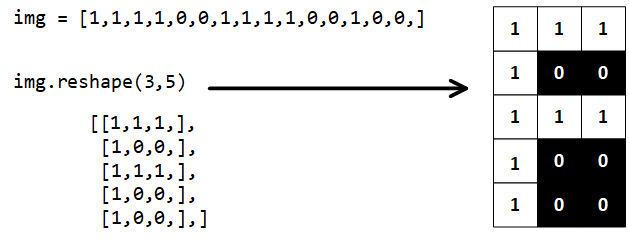

Каждое отдельное изображение может быть представлено в виде знаний массива (списка list в python).

In [27]:
symbol0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, # Изображение HxW. Символ - латинская буква M
           1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
           1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
           1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
           1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
           1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
           1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
           1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
           1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
           1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
          ]

symbol1 = [ # Изображение hxw. Символ - ...
]
symbol2 = [ # Изображение hxw. Символ - ...
]

In [28]:
_=0

[1, _, 1]

[1, 0, 1]

In [29]:
[1, _, _, _, _, _, _, _, _, 1, # Изображение HxW. Символ - латинская буква M
  1, 1, _, _, _, _, _, _, 1, 1,
  1, _, 1, _, _, _, _, 1, _, 1,
  1, _, _, 1, _, _, 1, _, _, 1,
  1, _, _, _, 1, 1, _, _, _, 1,
  1, _, _, _, 1, 1, _, _, _, 1,
  1, _, _, _, _, _, _, _, _, 1,
  1, _, _, _, _, _, _, _, _, 1,
  1, _, _, _, _, _, _, _, _, 1,
  1, 1, _, _, _, _, _, _, 1, 1,
]

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

In [30]:
print(symbol0)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]


Объединим отдельные изображения в обучающий набор `targetList`.

Используйте комбинацию клавиш `Ctrl+/` для быстрой постановки и снятия комментариев

In [31]:
targetList = list() # создать пустой список

targetList.append( symbol0)  # добавить изображение в список
# targetList.append( symbol1)
# targetList.append( symbol2)
# ...
print('targetList. Тип данных ', type(targetList))
print('targetList. Кол-во элементов ', len(targetList))

print(targetList)

targetList. Тип данных  <class 'list'>
targetList. Кол-во элементов  1
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]]


### Способ 2. Использование сохранённых файлов-изображений.

#### Создание и сохранение изображений используя графическое окно. Tkinter.

Для более удобного создания изображений вы можете использовать графическое окно рисования.

Определим переменные: `imgH`, `imgW` -размеры каждого изображения и `pathFotImgs` путь хранения файлов.

In [32]:
myImgH =  7
myImgW =  6
myPathFotImgs = 'imgsHopfield'

Следующий код подготовит отдельное графическое окно с областью для рисования.

<font color='red'>
Внимание! Данный способ создания окна для рисования изображений не сработает при работе в GoogleColab и расчитан на работу в локальном режиме установки jupyter.
</font>

In [33]:
class myWinTK ():
    ''' Класс графического окна для рисования изображений '''

    def getImage(self):
        _image = Image.fromarray( self.output_numpy*255.0, ).convert( mode='1') #  преобразовать к массиву значений, конвертировать в черно/белый
        #_image = _image.resize((self.widthSave, self.heightSave), PIL.Image.BILINEAR)  # привести к размеру
        #print(f'getImage  {_image.size}, type {type(_image)})
        return _image

    def saveToFileFunc(self):
        ''' сохранить изображение '''
        self.savedImgsCounter +=1
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
        filename = f'img_{timestamp}'
        filepathBig   = os.path.join(self.pathFotImgs,   '_smallResizedFromBig_'+filename+'.png')
        filepathSmall = os.path.join(self.pathFotImgs, f'[{self.widthSave},{self.heightSave}]'              +filename+'.png')

        _saved_image = self.getImage() # получить матрицу пикселей изображения с полотна области рисования
        _saved_image.save(filepathSmall, quality=100, subsampling=0) # сохранить
        print(f"- {self.savedImgsCounter}. Изображение сохранено {filepathSmall}")


    def drawGrid(self, workCanvas):
        # нанести сетку только для окна рисования (не применяется к финальному изображению)
        for ih in range(0, self.heightGUI//self.gridSize): # по высоте горизонтальные
            workCanvas.create_line(0,                 self.gridSize*ih*1, self.widthGUI,      self.gridSize*ih*1, fill='#555555')
        for iw in range(0 ,self.widthGUI//self.gridSize): # по ширине вертикальные
            workCanvas.create_line(self.gridSize*iw*1,                 0, self.gridSize*iw*1, self.heightGUI,     fill='#555555')

    def clearFunc(self):
        ''' очистить поле '''
        self.output_numpy[:] = 0
        self.draw.rectangle((0, 0, self.widthGUI, self.heightGUI), fill=(0, 0, 0, 0))
        self.canvasTk.delete("all")
        self.canvasTk.create_rectangle(0, 0, self.widthGUI, self.heightGUI, fill='black')
        self.drawGrid(workCanvas = self.canvasTk)
        if self.modelForPredictTensorflow is not None:
            self.T.delete('1.0', tk.END)
        if self.modelForPredictHopfield is not None:
            self.canvasHopfieldOut.delete("all")
            self.drawGrid(workCanvas = self.canvasHopfieldOut)

    def calcXY(self,nx,ny):
        grxScaled=nx*self.gridSize # масштабирование до видимого интерфейса
        gryScaled=ny*self.gridSize
        x1, y1 = grxScaled, gryScaled # вычисление углов масштабированого пикселя для до видимого интерфейса
        x2, y2 = (grxScaled + self.gridSize), (gryScaled + self.gridSize)
        return x1, y1, x2, y2

    def paintFunc(self,event):
        ''' нанести точку '''
        if  event.x>= self.widthGUI or event.y >=self.heightGUI :      return
        grx=event.x//self.gridSize # округление до номера клеток
        gry=event.y//self.gridSize
        x1, y1, x2, y2 = self.calcXY(nx=grx,ny=gry)

        colorName= None
        if event.num == 1 or event.state==264 or event.state==296 or event.state==272 or event.state==256:
            colorName = "white"
            colorBinary = 1
        elif event.num == 3 or event.state==1032 or event.state==1064 or event.state==1040 or event.state==1024:
            colorName = "black"
            colorBinary = 0

        if colorName:
            # видимый интерфейс
            self.canvasTk.create_rectangle(x1, y1, x2, y2, fill=colorName, width=1) #gridSize-1
            # полотно для сохранения
            self.draw.rectangle((x1, y1, x2, y2), fill=(255, 255, 255, 0))
            self.output_numpy[gry, grx] = colorBinary
        else:
            print('код события мыши не опознан', event, event.state)


    def predictFromDraw(self):
        ''' Подать изображение с полотна на вход модели НС для классификаии '''
        _image = self.getImage() # получить матрицу пикселей изображения с полотна области рисования
        numpy_array = np.array(_image, dtype=float)

        # Опрос модели
        # Переупаковка единственного изображения для подачи на вход НС
        numpy_array = numpy_array.reshape(1, self.widthSave, self.heightSave)
        #print("predictFromDraw:", numpy_array.shape)

        # Вызов ф. predict - вычисление одиночного ответа
        y_pred = self.modelForPredictTensorflow.predict(numpy_array)
        maxProbClassInd = tf.argmax(y_pred, axis=1).numpy()[0]
        if self.classNames!=None:  maxProbClass = self.classNames[maxProbClassInd]
        else:                      maxProbClass = maxProbClassInd

        # Вывод ответа в текстовое поле
        self.T.delete('1.0', tk.END)
        self.T.insert(tk.END,f'Ответы НС\n(макс. вероятн. Класс_{maxProbClass}):\n')

        for i, probability in enumerate(y_pred[0]):
            if self.classNames!=None:  yClassName_i = self.classNames[i]
            else: yClassName_i = i
            self.T.insert(tk.END, f'  Выч. класс_{yClassName_i}: {probability:>7.1%}\n' )

    def hopfieldNetFunc(self):
        _image = self.getImage() # получить матрицу пикселей изображения с полотна области рисования
        numpy_array = np.array(_image, dtype=float)
        numpy_array[numpy_array==0]=-1

        # Получить ответ
        out = self.modelForPredictHopfield.sim(
                                                input=numpy_array.reshape(1,-1) )
        out = out.reshape(numpy_array.shape[0],numpy_array.shape[1]) # приведение к массива размерности (H*W,) к (H,W)

        self.canvasHopfieldOut.delete("all") # очистить поле рисования второго окна

        for (col,row), val in np.ndenumerate( out ): # отобразить графически ответ НС - уставноить цвет областей "пикселей"
            if val==1:
                x1, y1, x2, y2 = self.calcXY(nx=row,ny=col)
                self.canvasHopfieldOut.create_rectangle(x1, y1, x2, y2, fill='white', width=1) #gridSize-1

        self.drawGrid(workCanvas = self.canvasHopfieldOut) # нанести сетку


    def __init__(self, imgW=50, ImgH=50, gridSize=None, modelTensorflow=None, modelHopfield=None, pathFotImgs = 'imgs', classNames=None):
        '''
        imgW=50, ImgH=50  - размер выходного сохраняемого изображения, в пикселях
        gridSize=None - размер пикселя-клетки при рисовании в графическом интрфейсе
        modelTensorflow = None - обученная модель TensorFlow для классификации
        modelHopfield   = None - обученная модель библиотеки neurolab
        pathFotImgs     = 'imgs' - путь для сохранения изображений
        classNames      = None -  список названий классов
        '''
        self.savedImgsCounter=0
        self.widthSave, self.heightSave = imgW, ImgH
        self.gridSize    = gridSize
        if self.gridSize is None:
            maxSide = max(self.widthSave, self.heightSave)
            if maxSide<10: self.gridSize = 300//maxSide
            else:          self.gridSize = 400//maxSide
        self.widthGUI,  self.heightGUI  = self.widthSave*self.gridSize, self.heightSave*self.gridSize  #размер видимого окна
        print(f'Размер изображения ШхВ = {self.widthSave}х{self.heightSave} пикс.')

        self.output_image    = PIL.Image.new("RGB", (self.widthGUI, self.heightGUI), (0,0,0)) # PIL Изображение
        self.draw            = PIL.ImageDraw.Draw(self.output_image)                          # поле для рисования
        self.output_numpy = np.zeros((self.heightSave, self.widthSave,),dtype=int)         # массив для значений пикселей

        # Графический интерфейс
        rootWindow = tk.Tk() # основное окно
        self.canvasTk = tk.Canvas(rootWindow, width=self.widthGUI, height=self.heightGUI, bg='black')
        self.canvasTk.bind("<B1-Motion>", self.paintFunc)
        self.canvasTk.bind("<B3-Motion>", self.paintFunc)
        self.canvasTk.bind("<Button-1>",  self.paintFunc)
        self.canvasTk.bind("<Button-3>",  self.paintFunc)
        self.canvasTk.pack(expand=tk.YES, fill=tk.BOTH)
        self.drawGrid(workCanvas = self.canvasTk)

        self.canvasHopfieldOut=None # поле для рисования второго окна для вывода ответов НС Хопфилда

        self.modelForPredictTensorflow = modelTensorflow # объекты обученных НС для получения ответов
        self.modelForPredictHopfield   = modelHopfield
        self.classNames = classNames

        # Элементы интерфейса в зависимости от режима
        if self.modelForPredictTensorflow is not None:
            print('РЕЖИМ РАБОТЫ: классификация нарисованного изображения')
            buttonPredict=tk.Button(text="Распознать",command=self.predictFromDraw)
            buttonPredict.config(bg='#CCCCFF')
            buttonPredict.pack()
            self.T = tk.Text(rootWindow, height = 14, width = 35)
            self.T.pack()
        elif self.modelForPredictHopfield is not None:
            print('РЕЖИМ РАБОТЫ: ассоциация сетью Хопфилда')
            buttonHopfieldNet=tk.Button(text="Получить ответ от сети Хопфилда",command=self.hopfieldNetFunc)
            buttonHopfieldNet.config(bg='#CCCCFF')
            buttonHopfieldNet.pack()
            hopfielWindow = tk.Toplevel() # второе окно для вывода ответов НС Хопфилда
            hopfielWindow.title("Вывод сети Хопфилда")
            hopfielWindow.attributes("-topmost",True) # видимость: окно появится на переднем плане, поверх всех других
            self.canvasHopfieldOut = tk.Canvas(hopfielWindow, width=self.widthGUI, height=self.heightGUI, bg='black') # объекты обученных НС для получения ответов
            self.canvasHopfieldOut.pack()
            self.drawGrid(workCanvas = self.canvasHopfieldOut)
        else:
            print('РЕЖИМ РАБОТЫ: рисование и сохранение изображений')
            # Проверка наличия и создание директории для изображений
            self.pathFotImgs = pathFotImgs
            print('Диретория для сохранения изображений: ', end='')
            if not os.path.exists(self.pathFotImgs):
                os.mkdir(self.pathFotImgs)
                print(f"Создана {os.path.join(os.getcwd(), self.pathFotImgs)}")
            else:
                print(f"Найдена {os.path.join(os.getcwd(), self.pathFotImgs)}")

            buttonSave=tk.Button(text="Сохранить в файл",command=self.saveToFileFunc)
            buttonSave.config(bg='#CCFFCC')
            buttonSave.pack()
        buttonClear=tk.Button(text="Очистить",command=self.clearFunc)
        buttonClear.config(bg='#FFCCCC')
        buttonClear.pack()
        my_label = tk.Label(rootWindow, text = "После рисования и обработки\n нужного кол-ва изображений\n обязательно закройте это окно")   #  , font= ('Aerial', 17))
        my_label.pack()

        #----------------------------
        rootWindow.title("Область рисования")
        rootWindow.attributes("-topmost",True) # видимость: окно появится на переднем плане, поверх всех других
        rootWindow.resizable(False, False)
        rootWindow.mainloop()                  # отобразить окно

Выполнение следующей команды создаст и отобразит графическое окно.

 - При нажатии на кнопку "Сохранить" содержимое окна будет сохранено в файл-изображение во вложенную папку "./imgs".  
 - Левая кнопка мыши задаёт белый цвет клетки
 - Правая кнопка мыши задаёт чёрный цвет клетки

Эта команда является блокирующей дальнейшее выполнение кода. **Обязательно закройте графическое окно** перед выполнением дальнейших команд.

In [34]:
#Создать экземпляр окна и отобразить
myWinTK (
    imgW = 6, ImgH = 7,   # размер выходного сохраняемого изображения, в пикселях
    pathFotImgs= myPathFotImgs, # путь для сохранения изображений
);

Размер изображения ШхВ = 6х7 пикс.
РЕЖИМ РАБОТЫ: рисование и сохранение изображений
Диретория для сохранения изображений: Найдена C:\Users\Nikita\Desktop\worksiimo\imgsHopfield


#### Загрузка файлов-изображений

Осмотрим содержимое выбранной папки используя функцию `glob`, которая найдет все пути, попадающие под заданный шаблон.

In [35]:
filePathPattern = myPathFotImgs+'/*.*'
print (f'Содержимое папки по шаблону поиска "{filePathPattern}"')
fileNameList = glob.glob(myPathFotImgs+'/*.*')

for i, fileName in enumerate(fileNameList):
    name, ext = os.path.splitext(fileName)
    print(f'- {i+1:>02}) Файл Расширение:"{ext.upper()}"  Имя: {fileName}')

Содержимое папки по шаблону поиска "imgsHopfield/*.*"
- 01) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-19-59-37.png
- 02) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-00-20.png
- 03) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-00-35.png
- 04) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-01-09.png
- 05) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-01-48.png
- 06) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-02-05.png
- 07) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-02-19.png
- 08) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-02-46.png
- 09) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-05-49.png
- 10) Файл Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-06-05.png


Используем функцию `Image.open` библиотеки PIL для чтения файлов-изображений с диска.
Объединим отдельные изображения в обучающий набор `targetList`.

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-19-59-37.png
Размер изоб.: (7, 6)


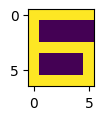

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-00-20.png
Размер изоб.: (7, 6)


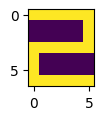

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-00-35.png
Размер изоб.: (7, 6)


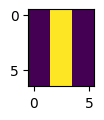

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-01-09.png
Размер изоб.: (7, 6)


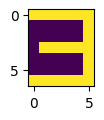

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-01-48.png
Размер изоб.: (7, 6)


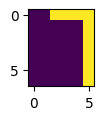

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-02-05.png
Размер изоб.: (7, 6)


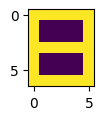

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-02-19.png
Размер изоб.: (7, 6)


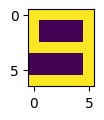

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-02-46.png
Размер изоб.: (7, 6)


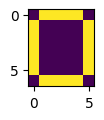

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-05-49.png
Размер изоб.: (7, 6)


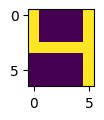

- Файл. Расширение:".PNG"  Имя: imgsHopfield\[6,7]img_2025-02-26-20-06-05.png
Размер изоб.: (7, 6)


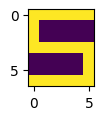

In [36]:
targetList = list() # создать пустой список

for fileName in fileNameList:
    name, ext = os.path.splitext(fileName)
    print(f'- Файл. Расширение:"{ext.upper()}"  Имя: {fileName}')

    if ext.upper() in ['.BMP', '.PNG', '.JPG' ]: # Проверить тип файла
        img = Image.open(fileName)   # Загрузить файл
        img = img.convert(mode='1')  # Конвертировать в черно/белый, иначе останется 3-цветовых канада
        imNumpy = np.asarray(img, dtype=float)  # Преобразовать в массив значений
        print('Размер изоб.:', imNumpy.shape)

        targetList.append(imNumpy) # Добавить изображение в список targetList

        #print(imNumpy)
        plt.figure(figsize=(1,1))  # Создать полотно для рисования, figsize-размер в дюймах
        plt.imshow(imNumpy)        # Отобразить массив как изображение
        plt.show()

- - -

## Обработка полученого списка изображений

В результате предыдущих шагов `targetList` список (`list` python) должен содержать несколько одиночных изображений.

In [37]:
print('targetList. Тип данных ', type(targetList))
print('targetList. Кол-во элементов ', len(targetList))
#print(targetList) # осмотр содержимого

targetList. Тип данных  <class 'list'>
targetList. Кол-во элементов  10


Создадим `targetNumpy` - массив Numpy с имеющимися изображениями. Для работы НС Хопфилда необходимо заменить все нулевые значения на -1.0, т.е. обеспечить биполярные значения +1.0, либо -1.0.

In [38]:
targetNumpy = np.asarray(targetList,  dtype=float)  # Создать массив Numpy, тип данных - вещественное число
print('targetNumpy. Тип данных ', type(targetNumpy))
print('targetNumpy shape = ', targetNumpy.shape)

targetNumpy[targetNumpy == 0] = -1.0   # Замена всех ячеек с "0" на "-1"

targetNumpy. Тип данных  <class 'numpy.ndarray'>
targetNumpy shape =  (10, 7, 6)


Осмотрим содержимое массива. Обратите внимание на размерность изображений.

In [39]:
targetNumpy # осмотр содержимого

array([[[ 1.,  1.,  1.,  1.,  1.,  1.],
        [ 1., -1., -1., -1., -1., -1.],
        [ 1., -1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.],
        [ 1., -1., -1., -1., -1.,  1.],
        [ 1., -1., -1., -1., -1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1., -1.,  1.],
        [-1., -1., -1., -1., -1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.],
        [ 1., -1., -1., -1., -1., -1.],
        [ 1., -1., -1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.]],

       [[-1., -1.,  1.,  1., -1., -1.],
        [-1., -1.,  1.,  1., -1., -1.],
        [-1., -1.,  1.,  1., -1., -1.],
        [-1., -1.,  1.,  1., -1., -1.],
        [-1., -1.,  1.,  1., -1., -1.],
        [-1., -1.,  1.,  1., -1., -1.],
        [-1., -1.,  1.,  1., -1., -1.]],

       [[ 1.,  1.,  1.,  1.,  1.,  1.],
        [-1., -1., -1., -1., -1.,  1.],
        [-1., -1., -1., -1., -1.,  1.],
        [-1.,  1.,  1.,  1.,  1., 

Осмотрим каждый элемент сформированного массива `targetNumpy` для проверки корректности преобразований. Используем функцию `matplotlib.pyplot.imshow`, которая отображает двумерную матрицу значений в графическом виде.

img shape =  (7, 6)


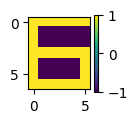

img shape =  (7, 6)


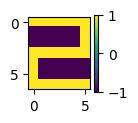

img shape =  (7, 6)


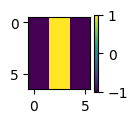

img shape =  (7, 6)


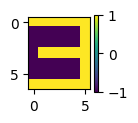

img shape =  (7, 6)


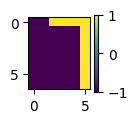

img shape =  (7, 6)


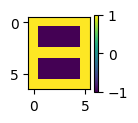

img shape =  (7, 6)


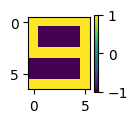

img shape =  (7, 6)


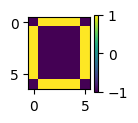

img shape =  (7, 6)


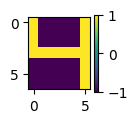

img shape =  (7, 6)


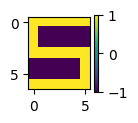

In [40]:
for img in targetNumpy:
    print('img shape = ',img.shape)
    plt.figure(figsize=(1,1)) # создать полотно для рисования, figsize-размер в дюймах
    plt.imshow(               # отобразить массив как изображение
       img,         # данные
       #cmap='gray' # название цветовой шкалы
    )
    plt.colorbar()            # отобразить цветовую шкалу
    #plt.axis(False)          # отключить подписи осей
    plt.show()                # отрисовать содержимое полотна

# Нейронная сеть Хопфилда

## Выбор состава обучающей части

Перед построением НС еще раз проверим размерность полученных образцов.

In [41]:
print('targetNumpy shape = ', targetNumpy.shape)
print('  кол-во изображений = ', targetNumpy.shape[0])
print('  размерность каждого изображения = ', targetNumpy.shape[1:])

targetNumpy shape =  (10, 7, 6)
  кол-во изображений =  10
  размерность каждого изображения =  (7, 6)


Выберем из исходных изображений некоторые по их порядковым номерам (индексам), и сформируем новый комплект `choosenTargetNumpy` - набор для очередного обучения НС. Для выбора подмассивов из исходного используем функцию `numpy.take`.

==Осмотр полученого комплекта==
img shape =  (7, 6)


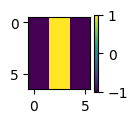

img shape =  (7, 6)


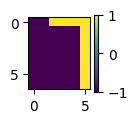

img shape =  (7, 6)


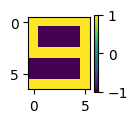

img shape =  (7, 6)


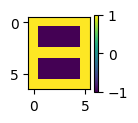

img shape =  (7, 6)


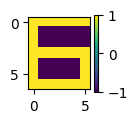

img shape =  (7, 6)


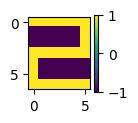

In [53]:
selectedIndexes = [2,4,6,5,0,1] # индексы (порядковые номера) выбранных

selectedTargetNumpy = np.take( # выбрать указанные подмассивы по индексам
    a=targetNumpy,           # общий массив
    indices=selectedIndexes, # индексы (порядковые номера) выбранных
    axis=0                   # режим навигации в многомерном массиве
)

print('==Осмотр полученого комплекта==')
for img in selectedTargetNumpy:
    print('img shape = ',img.shape)
    plt.figure(figsize=(1,1)) # создать полотно для рисования, figsize-размер в дюймах
    plt.imshow(               # отобразить массив как изображение
       img,         # данные
       #cmap='gray' # название цветовой шкалы
    )
    plt.colorbar()            # отобразить цветовую шкалу
    #plt.axis(False)          # отключить подписи осей
    plt.show()                # отрисовать содержимое полотна

Значения в массиве `selectedTargetNumpy` и `targetNumpy` хранятся в естественной для изображений размерности, эта же размерность позволяет напрямую передавать изображения в функции отображения на экран графических библиотек.

Нейросеть Хопфилда ожидает в качестве обучающих данных массив особой размерности: состоящий из одного и более **одномерных** векторов.
Следовательно массив `targetNumpy` размерностью (N, H, W) из N изображений размером H x W, должен быть преобразован к (N, H*W).

Для преобразования к требуемой размерности используем функцию `.reshape(кол-во изображений, -1)`, где второй параметр позволит развернуть каждое изображение в одномерный вектор. Проверим ёё работу.

In [54]:
countOfImgs = selectedTargetNumpy.shape[0] # кол-во изображений
print('shape = ',                        selectedTargetNumpy.reshape(countOfImgs,-1).shape)
print('  кол-во изображений = ',         selectedTargetNumpy.reshape(countOfImgs,-1).shape[0])
print('  размерность каждого изображения = ', selectedTargetNumpy.reshape(countOfImgs,-1).shape[1:])

print('Содержимое массива')
#choosenTargetNump.reshape( # ф. изменения размерности (кол-во образцов, -1)
#    countOfImgs,          # кол-во изображений
#    -1                    # новый размер
#)

shape =  (6, 42)
  кол-во изображений =  6
  размерность каждого изображения =  (42,)
Содержимое массива


## Создадим и обучим НС Хопфилда на выбранных образцах

Для создания НС Хопфилда воспользуемся пакетом neurolab и конструктором

`neurolab.net.newhop(target, transf=None, max_init=10, delta=0)`, со следующими параметрами:
  - `target`:   Обучающий массив размерностью `(N, h*w)` из N образцов (одного и более), каждый элемент - одномерный векторо размером `h*w`
  - `transf`:   Функция активации
  - `max_init`: Макс. рекуррентных итераций
  - `delta`: Минимальна разность между 2 выходами для остановки цикла (по умолч 0.0)

В данная реализации НС обучение происходи в момент создания и объект не содержит отдельной функции дополнительного обучения. Содержит единственный полносвязный слой.

In [55]:
# Создать и обучить НС
net = nl.net.newhop(
    target   = selectedTargetNumpy.reshape(countOfImgs, -1),  # Обучающие данные
    transf   = nl.trans.HardLims(),  # Функция активации nl.trans.TanSig(), nl.trans.HardLims()
    max_init = 10,                   # Макс. рекуррентных итераций
    delta    = 0.0
)

## Осмотр карты весовых коэфф.

Получим общее кол-во слоёв НС.

In [56]:
print('Кол-во слоёв нейросети Хопфилда = ', len (net.layers))

Кол-во слоёв нейросети Хопфилда =  1


Весовые коэфф. слоя хранятся в структуре словарь(хэш-таблица) и доступны по ключам `w` и `b`.

In [57]:
net.layers[0].np.keys()

dict_keys(['w', 'b'])

Коэфф. НС представлены в виде матрицы с размером (`H*W` x `H*W`), где H*W - кол-во входных параметров, и отображает веса полносвязной структуры.

In [58]:
print('Размер матрицы весовых коэфф. = ', net.layers[0].np['w'].shape)
print(
    np.round ( # применить округление значений
        net.layers[0].np['w'], decimals=2) )

Размер матрицы весовых коэфф. =  (42, 42)
[[0.   0.14 0.05 ... 0.1  0.14 0.1 ]
 [0.14 0.   0.05 ... 0.1  0.14 0.1 ]
 [0.05 0.05 0.   ... 0.1  0.05 0.1 ]
 ...
 [0.1  0.1  0.1  ... 0.   0.1  0.05]
 [0.14 0.14 0.05 ... 0.1  0.   0.1 ]
 [0.1  0.1  0.1  ... 0.05 0.1  0.  ]]


Для удобства восприятия отобразим матрицу весов в виде тепловой карты.

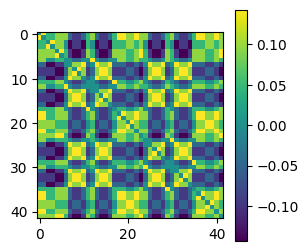

In [59]:
plt.figure(figsize=(3,3))          # создать полотно для рисования, figsize-размер в дюймах
plt.imshow(
    net.layers[0].np['w'],  # данные
    #cmap='gray', # название цветовой шкалы
    #vmin=-0.1,   # мин.  значение цветовой шкалы
    #vmax=0.1,    # макс. значение цветовой шкалы
)
plt.colorbar()            # отобразить цветовую шкалу
plt.show()                # отрисовать содержимое полотна

# Опрос нейронной сети

## Опрос по всем образцам

Для начала проверим как НС различает образцы, на которых она была обучена.
Для получения ответов НС используем функцию `.sim (input)`, где `input` - также массив из одного и более образцов - одномерных векторов (N, h*w).

In [60]:
# Получить ответы НС
output = net.sim(
    input=selectedTargetNumpy.reshape(countOfImgs, -1)
)
print('output shape =', output.shape)

output shape = (6, 42)


Обратите внимание, что ответ НС `output` также состоит из набора одномерных векторов, которые необходимо привести к размерности исходных изображений.

In [61]:
output = output.reshape( # перепаковать ответы НС к размерности изображений (N, h, w)
    output.shape[0],               # N - кол-во ответов НС
    selectedTargetNumpy.shape[1],  # h - высота исходного изобр.
    selectedTargetNumpy.shape[2],  # w - ширина исходного изобр.
)
print(np.round (output, decimals=2))

[[[-1. -1. -1. -1. -1. -1.]
  [-1.  1.  1.  1.  1. -1.]
  [-1.  1.  1.  1.  1. -1.]
  [-1. -1. -1. -1. -1. -1.]
  [-1.  1.  1.  1.  1. -1.]
  [-1.  1.  1.  1.  1. -1.]
  [-1. -1. -1. -1. -1. -1.]]

 [[ 1.  1.  1.  1.  1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1.  1.  1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.  1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1.  1.  1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.  1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1.  1.  1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.  1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1. -1. -1. -1. -1.  1.]
  [ 1.  1.  1.  1.  1.  1.]]

 [[ 1.  1.

Для наглядного сравнения входных значений и ответов НС отобразим эти пары в виде изображений.

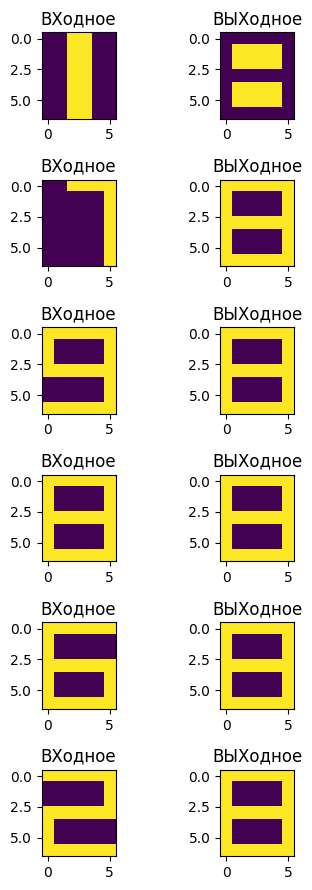

In [62]:
fig, axs = plt.subplots( # создать полотно
    nrows=countOfImgs,          # кол-во строк = образцов
    ncols=2,                    # кол-во столбцов = 2
    figsize=(4, countOfImgs*1.5)
)

# для каждого изображений
for i, img in enumerate(selectedTargetNumpy):

    if countOfImgs ==1: # axs[номер строки][номер столбца]
        leftAx =  axs[0]
        rightAx =  axs[1]
    else:
        leftAx  = axs[i][0]
        rightAx = axs[i][1]

    leftAx.imshow(   # отобразить массив как тепловую карту
       selectedTargetNumpy[i],  # данные
       #cmap='gray'     # название цветовой шкалы
    )

    rightAx.imshow(  # отобразить массив как тепловую карту
       output[i],      # данные
       #cmap='gray'    # название цветовой шкалы
    )
    leftAx.set_title('ВХодное'); rightAx.set_title('ВЫХодное')
plt.tight_layout()

## Опрос по единственному образцу с искажениями

Выберем один из исходных символов, внеся в него искажения путём замены значений матрицы пикселей.

In [396]:
imgNum= 0
testImg = selectedTargetNumpy[imgNum] # получить исходный символ из выбранного комплекта
testImg[testImg==-1] = 0 # для повышения читаемости произвести обратную замену -1 на 0
testImg

array([[0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]])

Используем значения предыдущего вывода для создания нового массива `testImgNoised` (для быстрого редактирования вертикальной области используйте множественное выделение текста комбинацией SHIFT+ALT+CTRL+Левая кнопка мыши).

testImg shape =  (7, 6)


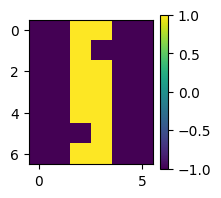

In [397]:
testImgNoised = np.asarray(
      # скопируйте значенния из ячейки выше и замените некоторые элементы-пиксели
      [[0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]]
      ,dtype=float
)

#testImgNoised = testImgNoised.reshape(10,10) # приведение к массива размерности (35,) к (7,5)
testImgNoised[testImgNoised==0] = -1 # замена нулей на -1
print('testImg shape = ', testImg.shape)

plt.figure(figsize=(2,2)) # создать полотно для рисования, figsize-размер в дюймах
plt.imshow( # отобразить массив как тепловую карту
    testImgNoised,        # данные
    #cmap='gray' # название цветовой шкалы
)
plt.colorbar()            # отобразить цветовую шкалу

Содержимое матрицы `testImgNoised` для передачи в НС должно быть преобразовано к массиву одномерных векторов. Выполнить эту операцию можно нескольким способами, например:
  - testImg.reshape(1,-1)

In [398]:
testImgNoised.reshape(1,-1).shape

(1, 42)

Предъявим зашумлённое изображение на вход нейронной сети с помощью команды `net.sim( )` и получим от нёё ответ.
Для сравнения входного и выходного изображения сопоставим их в графическом виде.

[[-1. -1.  1.  1. -1. -1.]
 [-1. -1.  1.  1. -1. -1.]
 [-1. -1.  1.  1. -1. -1.]
 [-1. -1.  1.  1. -1. -1.]
 [-1. -1.  1.  1. -1. -1.]
 [-1. -1.  1.  1. -1. -1.]
 [-1. -1.  1.  1. -1. -1.]]


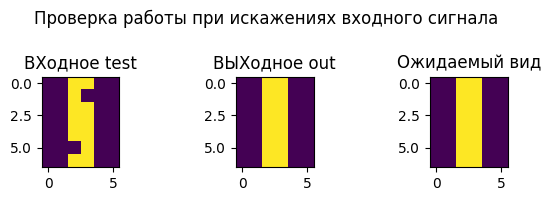

In [399]:
out = net.sim(
    input=testImgNoised.reshape(1,-1) )
out = out.reshape(7,6) # приведение к массива размерности (H*W,) к (H,W)
print(out)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(6, 2)) # создать несколько полотен для рисования, figsize-размер в дюймах, nrows - строк, ncols - столбцов
axs[0].imshow(testImgNoised) # axs[номер столбца]
axs[1].imshow(out)
axs[2].imshow(testImg)
axs[0].set_title('ВХодное test'); axs[1].set_title('ВЫХодное out'); axs[2].set_title('Ожидаемый вид')
fig.suptitle('Проверка работы при искажениях входного сигнала')
plt.tight_layout()

## Опрос по прямому графическому вводу

Используя графическое окно для рисования символов, проверьте влияния места расположения и степени искажений на ответы НС.

Запустите следующий код, в результате появится **два** окна. "Область рисования" предназначена для создания графического символа, при нажатии кнопки "Получить ответ" текущее содержимое будет передано на вход связанной НС. Ответ НС будет отображен в окне "Вывод сети Хопфилда". Обратите внимание на необходимость держать в соответствии размер поля для рисования и кол-во узлов (входов и выходов) НС.

Выполнение следующей команды создаст и отобразит графическое окно. Эта команда является блокирующей дальнейшее выполнение кода. **Обязательно закройте графическое окно** перед выполнением дальнейших команд.

In [180]:
print(f'Кол-во узлов выбранной НС Хопфилда = {net.ci}')

Кол-во узлов выбранной НС Хопфилда = 42


In [181]:
myWinTK (
    imgW=6, ImgH=7,  # размер поля для создания изображения
    modelHopfield=net,   # передать в качестве параметра обученную модель НС Хопфилда библиотеки neurolab
);

Размер изображения ШхВ = 6х7 пикс.
РЕЖИМ РАБОТЫ: ассоциация сетью Хопфилда


# Выводы


- Сделайте заключения и обобщения на основе полученных результатов;
- Оцените изменение карты весов при увеличении кол-ва запоминаемых сетью образцов;
- Оцените устойчивость НС к искажениям входных изображений;
- Оцените влияние вида символов в обучающем наборе на успешность его корректного распознавания;
- …
__________________________________
__________________________________
__________________________________
__________________________________
__________________________________